---
# *EFA: Explainatory factor analysis*

### *Exploratory factor analysis VS Principle components analysis*
* *EFA : may be used to identify the structure underlying such variables and to estimate scores to measure laten factors-->("latent" referes to something hidden, potential, or not yet apparent -(factors that are present but not readily visible or easily measured)-*
* *PCA : used to find optimal ways of combining variables into a small number of subsets*

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os

In [75]:
df=pd.read_csv(r"Data_Set\mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


---
### *Data Shape :*

In [76]:
df.shape

(32, 12)

---
### *Data Info :*

In [77]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


---
### *Data Cleaning :*
#### *Na-Values & Duplicated rows*

In [78]:
print("The Total Number of Null Values are : ", df.isna().sum().sum())
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of Null Values are :  0
The Total Number of duplicated rows are :  0


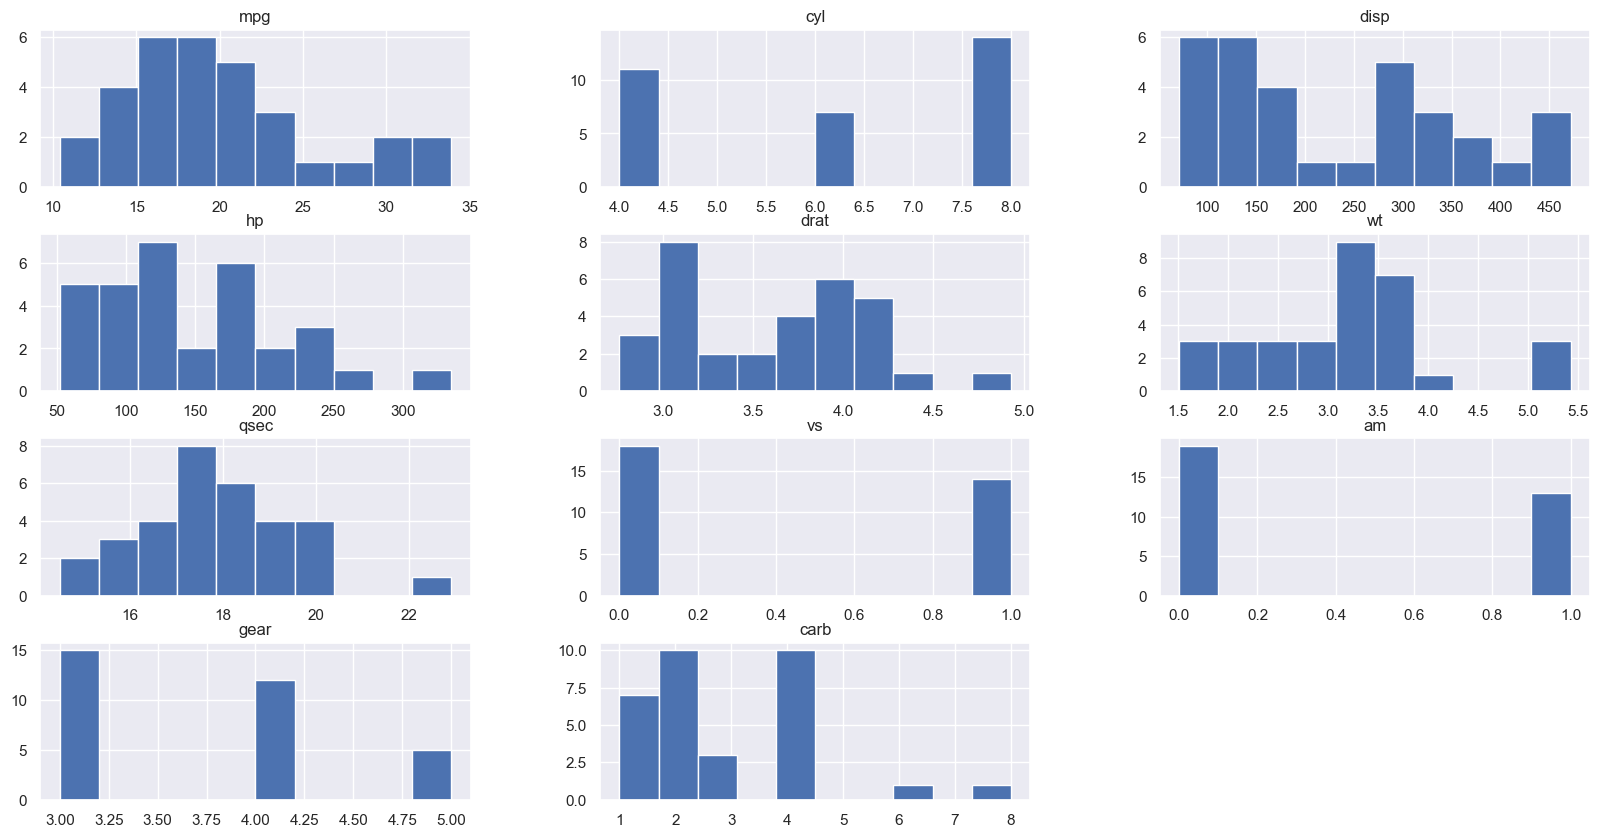

In [79]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(figsize=(20,10))
plt.show()

In [80]:
from sklearn.preprocessing import OrdinalEncoder
df["model"]=OrdinalEncoder().fit_transform(df[["model"]])
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,17.0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,18.0,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4.0,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,12.0,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,13.0,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


---
*Data Scaling*

In [81]:
new_df=df.copy()
from sklearn.preprocessing import scale
scaled_df=scale(new_df)

In [82]:
from factor_analyzer import FactorAnalyzer

---
### *calculate_bartlett_sphericity*
* *the observed correlation matrix is compared with the identity matrix using calculate_bartlett_sphericity*  
*H0:observed matrix is identity matrix*  
*H1:observed matrix is not an identity matrix*  
*--> If the p value is less than 0.05 --> we can reject H0, and say that the observed matrix is not an identity matrix*  
* *Identity matrix : a square matrix in which all the elements of the principal or main diagonal are 1's and all other elements are zeros*

In [101]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
ch2_value,p_value=calculate_bartlett_sphericity(scaled_df)
print(f"The ch2 value : {ch2_value}.\nThe p-value : {p_value}")
if p_value < 0.05:
    print(f"The p value is less than 0.05 --> we can reject H0, and say that the observed matrix is not an identity matrix")
else:
    print(f"The p value is more than 0.05 --> we can accept H0 , and say that the observed matrix isan identity matrix")    


The ch2 value : 411.13555348155427.
The p-value : 2.4573636160789243e-51
The p value is less than 0.05 --> we can reject H0, and say that the observed matrix is not an identity matrix


---
### *calculate_kmo*  
* *measure of sampling adequacy*  
*should not be less than 0.5 the overall and for each factor*

In [102]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df)
print(f"The kmo_model value : {kmo_model}")
if kmo_model > 0.5:
    print(f"The kmo_model value is more than 0.5 --> The sample is adequate")  
else:
    print(f"The kmo_model value is less than 0.5 --> The sample is not adequate")
    

The kmo_model value : 0.8199901686229404
The kmo_model value is more than 0.5 --> The sample is adequate


---

#### *Model's most important parametrs you need to know:* 
*Rotation Options :*  
*1. Orthogonal (uncorrelated factors):*

* *'varimax', 'oblimax', 'quartimax', 'equamax', 'geomin_ort'*  
* * *varimax : Most common; maximizes variance of squared loadings—clean, interpretable factors*

*2. Oblique (allows correlated factors):*  

* *'promax', 'oblimin', 'quartimin', 'geomin_obl'*
* * *If you'd like factors to be correlated (more realistic for psychological data)*

*3. To disable rotation entirely, set rotation=None.*

---
*Method	Description	Use When...*  
- *principal  -->	Principal Axis Factoring (similar to PCA but estimates communalities)	--> You want a fast, straightforward exploratory solution*    
- *minres	--> Minimum Residual (a least-squares ML-like method)	--> You prioritize model fit (minimizing residuals)*    
- *ml	--> Maximum Likelihood (assumes normality; allows fit testing)	--> You want to compute fit indices and formally test extraction*    

---
### *Model apply*
* *Model apply with no rotaion**

In [103]:
from factor_analyzer import FactorAnalyzer
fa=FactorAnalyzer(rotation=None)
fa.fit(scaled_df)

FactorAnalyzer(rotation=None, rotation_kwargs={})

---
*Get the model loadings_ values* 

In [104]:
pd.DataFrame.from_records(fa.loadings_)

,0,1,2
0,0.306571,-0.179180,0.153344
1,0.922756,0.047305,-0.160565
2,-0.964817,0.052056,-0.131541
3,-0.945151,-0.094072,-0.071706
4,-0.845722,0.375832,0.098806
5,0.721915,0.425418,0.074409
6,-0.880131,-0.251791,0.245656
7,0.533185,-0.758711,0.321864
8,0.771519,-0.335206,0.209979
9,0.579648,0.686677,-0.123755


---
*Get the model factor varianc* 

In [105]:
pd.DataFrame.from_records(fa.get_factor_variance(),
                          index=["Sum of squared loadings (Factor variance)","Proportional variance","Cumulative variance"])

,0,1,2
Sum of squared loadings (Factor variance),6.569061,2.549138,0.527153
Proportional variance,0.547422,0.212428,0.043929
Cumulative variance,0.547422,0.759850,0.803779


---
*Get the model eigenvalues to plot and select the best number of factors* 

In [106]:
ev,v=fa.get_eigenvalues()

---

In [107]:
fa.rotation_matrix_ # *No rotation_matrix_ Reults as we have bot selected any rotation*
fa.structure_ # The structure loading matrix. This only exists if rotation is ‘promax’ and is None otherwise
fa.phi_ #The factor correlations matrix. This only exists if rotation is ‘oblique’ and is None otherwise.

---
*Get the model communalities and uniquenesses* 

In [108]:
pd.concat([pd.DataFrame(fa.get_communalities(),columns=["communalities"],index=new_df.columns.to_list()),
           pd.DataFrame(fa.get_uniquenesses(),columns=["uniquenesses"],index=new_df.columns.to_list())],axis=1)

,communalities,uniquenesses
model,0.149606,0.850394
mpg,0.879498,0.120502
cyl,0.950884,0.049116
disp,0.907302,0.092698
hp,0.866258,0.133742
drat,0.707679,0.292321
wt,0.898376,0.101624
qsec,0.963526,0.036474
vs,0.751696,0.248304
am,0.822833,0.177167


---

*Scree plot*

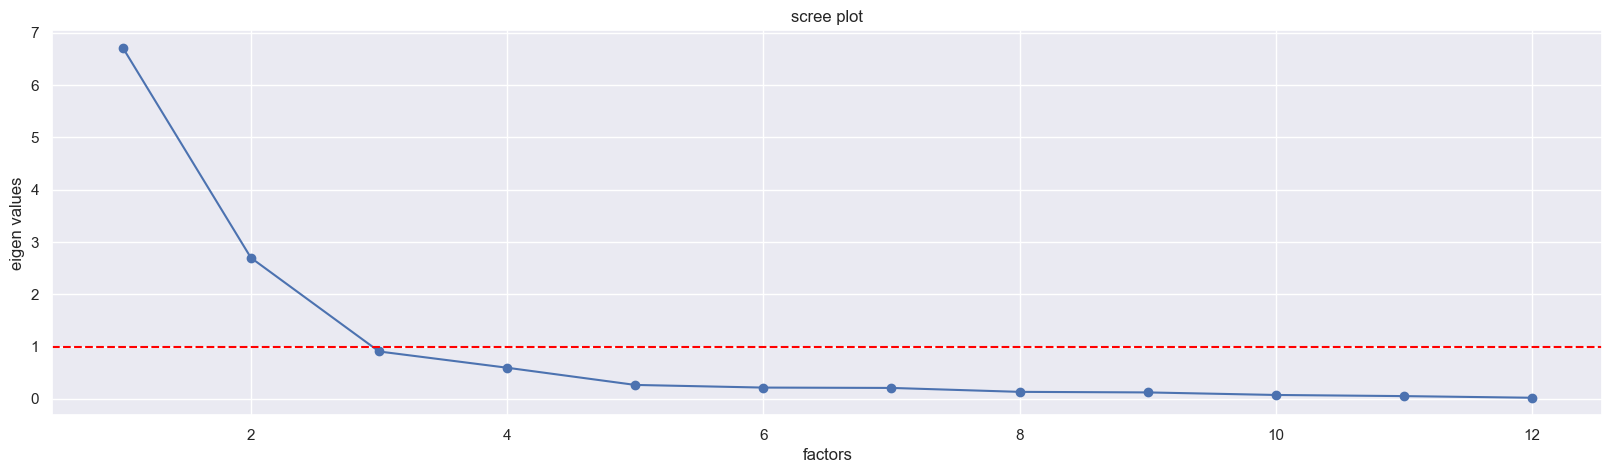

In [109]:
plt.figure(figsize=(20, 5))
plt.scatter(range(1,len(ev)+1),ev)
plt.plot(range(1,len(ev)+1),ev)
plt.axhline(1,color="red",linestyle='--',)
plt.title("scree plot")
plt.ylabel("eigen values")
plt.xlabel("factors");

*--> We will re-apply the model again with selecting 2 factors*

---
*Apply the FactorAnalyzer() with 2 factors and varimax roration and principal methos*

In [110]:
from factor_analyzer import FactorAnalyzer
fa_2f=FactorAnalyzer(n_factors=2,rotation="varimax",method="principal")
fa_2f.fit(scaled_df)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

---
*Get the model loadings_ values* 

In [111]:
pd.DataFrame.from_records(fa_2f.loadings_,index=new_df.columns.to_list(),columns=["Factor 1","Factor 2"])


,Factor 1,Factor 2
model,0.067236,-0.426039
mpg,0.694748,-0.619041
cyl,-0.647599,0.712627
disp,-0.738722,0.601692
hp,-0.337117,0.873037
drat,0.856821,-0.194674
wt,-0.806307,0.441294
qsec,-0.148036,-0.905220
vs,0.311922,-0.811855
am,0.921192,0.095345


---
*Get the model factor variance* 

In [112]:
pd.DataFrame.from_records(fa_2f.get_factor_variance(),
                          index=["Sum of squared loadings (Factor variance)","Proportional variance","Cumulative variance"]
                          ,columns=["Factor 1","Factor 2"])

,Factor 1,Factor 2
Sum of squared loadings (Factor variance),4.734217,4.674399
Proportional variance,0.394518,0.389533
Cumulative variance,0.394518,0.784051


---
*Get the model rotation matrixe* 

In [113]:
pd.DataFrame(fa_2f.rotation_matrix_)

,0,1
0,0.712354,-0.701821
1,0.701821,0.712354


---

In [114]:
fa_2f.structure_ # The structure loading matrix. This only exists if rotation is ‘promax’ and is None otherwise
fa_2f.phi_ #The factor correlations matrix. This only exists if rotation is ‘oblique’ and is None otherwise.

---
*Get the model communalities and uniquenesses* 

In [115]:
pd.concat([pd.DataFrame(fa_2f.get_communalities(),columns=["communalities"],index=new_df.columns.to_list()),
           pd.DataFrame(fa_2f.get_uniquenesses(),columns=["uniquenesses"],index=new_df.columns.to_list())],axis=1)

,communalities,uniquenesses
model,0.186030,0.813970
mpg,0.865886,0.134114
cyl,0.927221,0.072779
disp,0.907742,0.092258
hp,0.875842,0.124158
drat,0.772040,0.227960
wt,0.844871,0.155129
qsec,0.841337,0.158663
vs,0.756403,0.243597
am,0.857685,0.142315


*High communalities mean your model is capturing the structure of your data well.*

*Low communalities suggest certain variables might be poorly represented and could be removed or you may need additional factors.*

---
*Plot Results by visualizing 2D Correlation Circle*

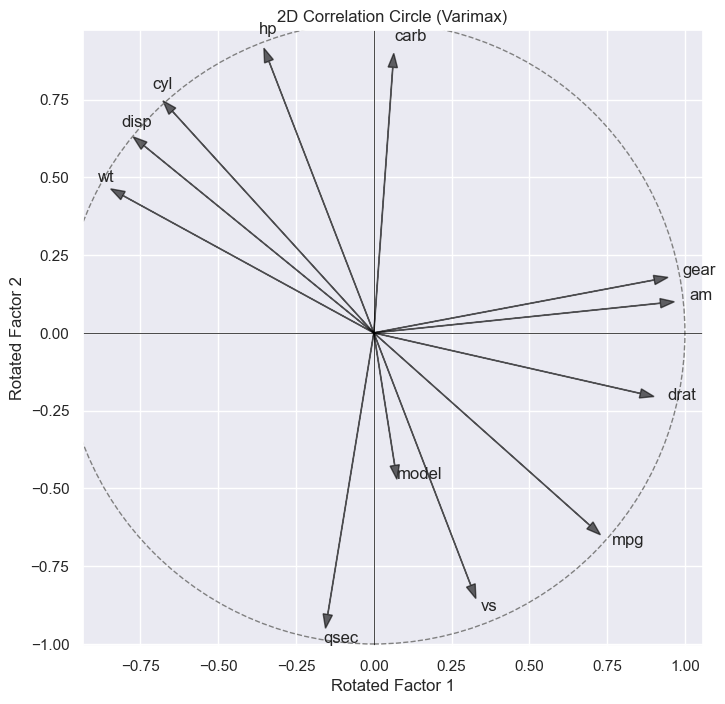

In [116]:
import numpy as np

rotated_loadings=fa_2f.loadings_
L = rotated_loadings[:, :2]  # first two factors
labels = new_df.columns

plt.figure(figsize=(8,8))
for i, (x, y) in enumerate(L):
    plt.arrow(0, 0, x, y, head_width=0.03, alpha=0.6,color='black')
    plt.text(x*1.1, y*1.1, labels[i])

circle = plt.Circle((0,0), 1, fill=False, color='gray', linestyle='--')
plt.gca().add_artist(circle)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Rotated Factor 1')
plt.ylabel('Rotated Factor 2')
plt.title('2D Correlation Circle (Varimax)')
plt.axis('equal')
plt.show()

🎯 What It Shows  
- *Each arrow represents a variable's correlation pattern with the first two rotated factors.* 

- *The arrows' (x, y) coordinates are the loadings (𝜆𝑖1,𝜆𝑖2), indicating how strongly the variable relates to Factor 1 and Factor 2.*  

- *A surrounding unit circle indicates the maximum possible loading magnitude (since correlations range between −1 and +1).*  
###  
🔍 Interpreting Positions and Angles
Direction of Arrows :

- *If a variable arrow is mostly aligned with the x-axis → strong loading on Factor 1. --> example: am*

- *Mostly along the y-axis → it loads strongly on Factor 2. --> example: carb*

- *Directed 45° into the quadrant → it loads on both factors. --> example: disp*
###
Length from Origin

- *Longer arrows (closer to circle edge = √(x² + y²) near 1) mean the two factors explain more of that variable's variance. --> example: most variables*

- *Short arrows near the center indicate the variable isn't well represented by these two factors (low squared loading). --> example: model*
###
Angles Between Arrows

- *Small angles between arrows → variables are positively correlated. --> example: am-gear*

- *~180° angles → they are negatively correlated. --> example: carb-model*

- *~90° angles → they are uncorrelated. --> example: qsec-wt*

---
*Visualising the factors loadings by bar plot* 

<Axes: >

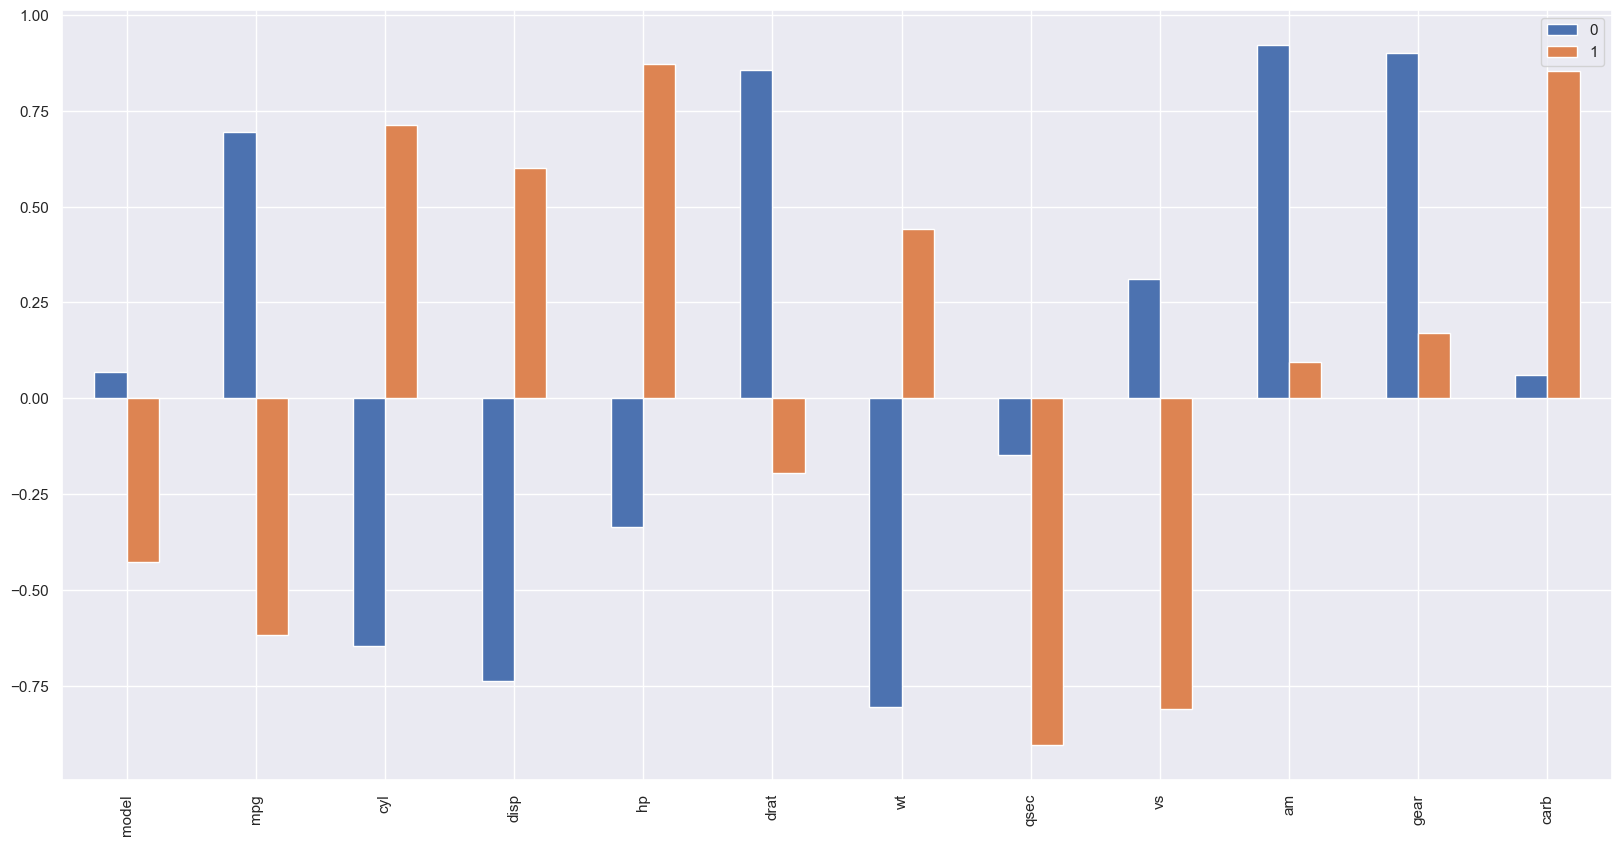

In [117]:
pd.DataFrame.from_records(fa_2f.loadings_,index=new_df.columns.to_list()).plot(kind="bar")

---
*Visualising the factors loadings by heatmap for better understanding* 

<Axes: >

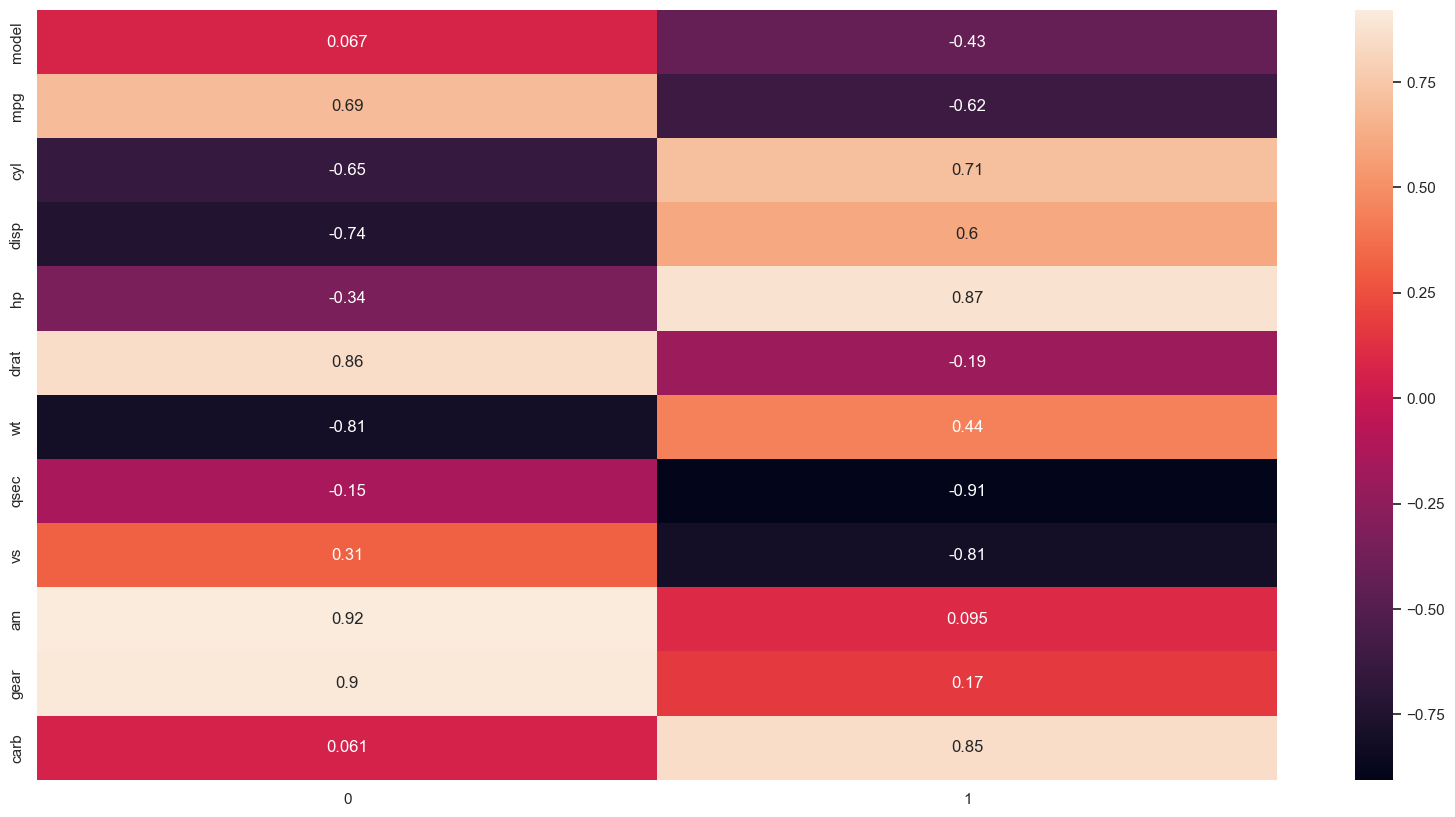

In [118]:
sns.heatmap(pd.DataFrame.from_records(fa_2f.loadings_,index=new_df.columns.to_list()),annot=True)